# pd.read_csv

+ intro to bc
+ some [notes](https://smart-stats.github.io/ds4bio_book/book/_build/html/binary_classification.html)
+ jupyter-lab
+ vscode (not optimal)
+ differences?
+ requests, io, warnings

```
cp python.ipynb ../3.dna.origins/training/chapter7.ipynb
nano ../3.dna.origins/training/_toc.yml
```

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import io 
import warnings 
## this sets some style parameters
sns.set()
from sklearn.metrics import accuracy_score, roc_curve, auc
warnings.filterwarnings('ignore')

In [2]:
url = "https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/oasis.csv"
content = requests.get(url).content.decode('utf-8')
dat = pd.read_csv(io.StringIO(content))
dat.head(4)
dat.shape

(100, 13)

GOLD_Lesions
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: FLAIR, dtype: object

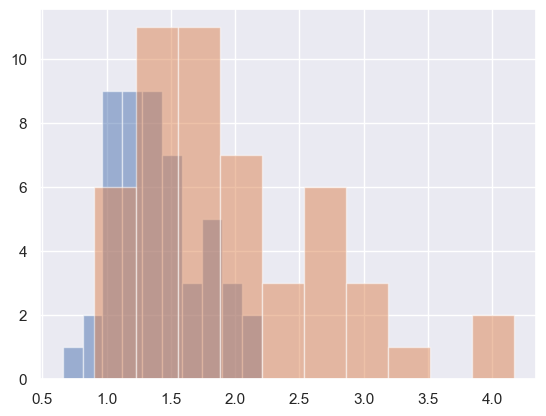

In [3]:
dat.groupby('GOLD_Lesions').FLAIR.hist(alpha= .5)

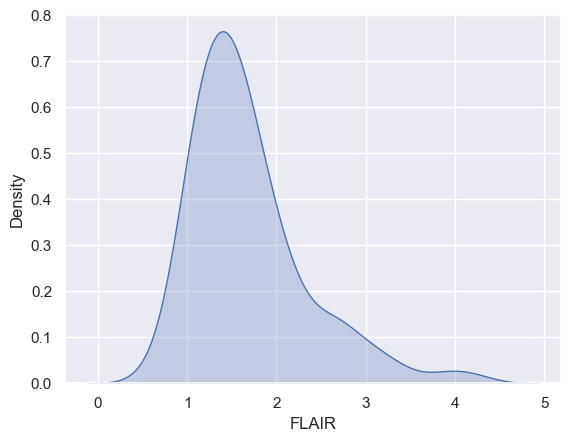

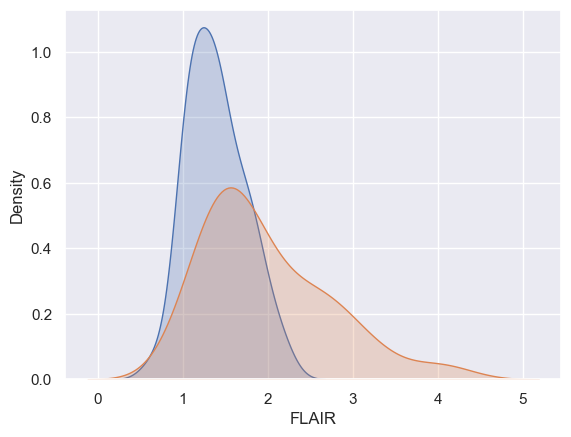

In [4]:
x0 = dat.FLAIR[dat.GOLD_Lesions == 0]
x1 = dat.FLAIR[dat.GOLD_Lesions == 1]
x2 = dat.FLAIR


sns.kdeplot(x2, shade = True, label = 'Marginal')

plt.show()

sns.kdeplot(x0, shade = True, label = 'Gold Std = 0')
sns.kdeplot(x1, shade = True, label = 'Gold Std = 1')

plt.show()

In [5]:
x = dat.FLAIR
y = dat.GOLD_Lesions
n = len(x)
trainFraction = .75

## Build a training and testing set
## Prob of being in the train set is trainFraction
sample = np.random.uniform(size = n) < trainFraction

## Get the training and testing sets
xtrain = x[ sample]
ytrain = y[ sample]
xtest =  x[~sample]
ytest =  y[~sample]

In [6]:
## Starting values, just set it to 
## 0 so that it improves on the first
## try
bestAccuracySoFar = 0

for t in np.sort(xtrain):
  ## Strictly greater than the threshold is
  ## our algorithm
  predictions = (xtrain > t)
  accuracy = np.mean(ytrain == predictions)
  if (accuracy > bestAccuracySoFar):
    bestThresholdSoFar = t 
    bestAccuracySoFar = accuracy 

threshold = bestThresholdSoFar
  

In [7]:
## Let's test it out on the test set
testPredictions = (xtest > threshold)

## The test set accuracy
testAccuracy = np.mean(testPredictions == ytest)

## Let's see how it specifically does on the
## set of instances where ytest == 0 and ytest == 1
## The % it gets correct on ytest == 0 is called
## the specificity and the percent correct when 
## ytest == 1 is called the sensitivity.
sub0 = ytest == 0
sub1 = ytest == 1

testSpec = np.mean(ytest[sub0] == testPredictions[sub0])
testSens = np.mean(ytest[sub1] == testPredictions[sub1])

pd.DataFrame({
 'Threshold': threshold,
 'Accuracy': testAccuracy, 
 'Specificity': testSpec, 
 'Sensitivity': testSens}, index = [0])

,Threshold,Accuracy,Specificity,Sensitivity
0,1.419322,0.666667,0.416667,0.833333


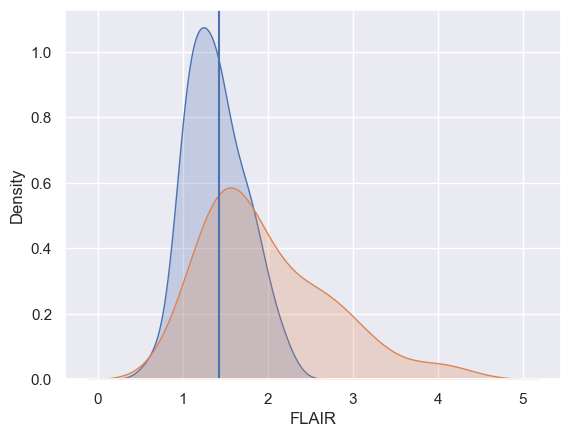

In [8]:
sns.kdeplot(x0, shade = True, label = 'Gold Std = 0')
sns.kdeplot(x1, shade = True, label = 'Gold Std = 1')
plt.axvline(x=threshold)
            
plt.show()